<a href="https://colab.research.google.com/github/dvd3110/Major_Project_2/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python scikit-image

Mounted at /content/drive


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 42,992,070 (164.00 MB)

 Trainable params: 10,534,604 (40.19 MB)

 Non-trainable params: 11,388,256 (43.44 MB)

 Optimizer params: 21,069,210 (80.37 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Using layer: block14_sepconv2_act


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_1']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


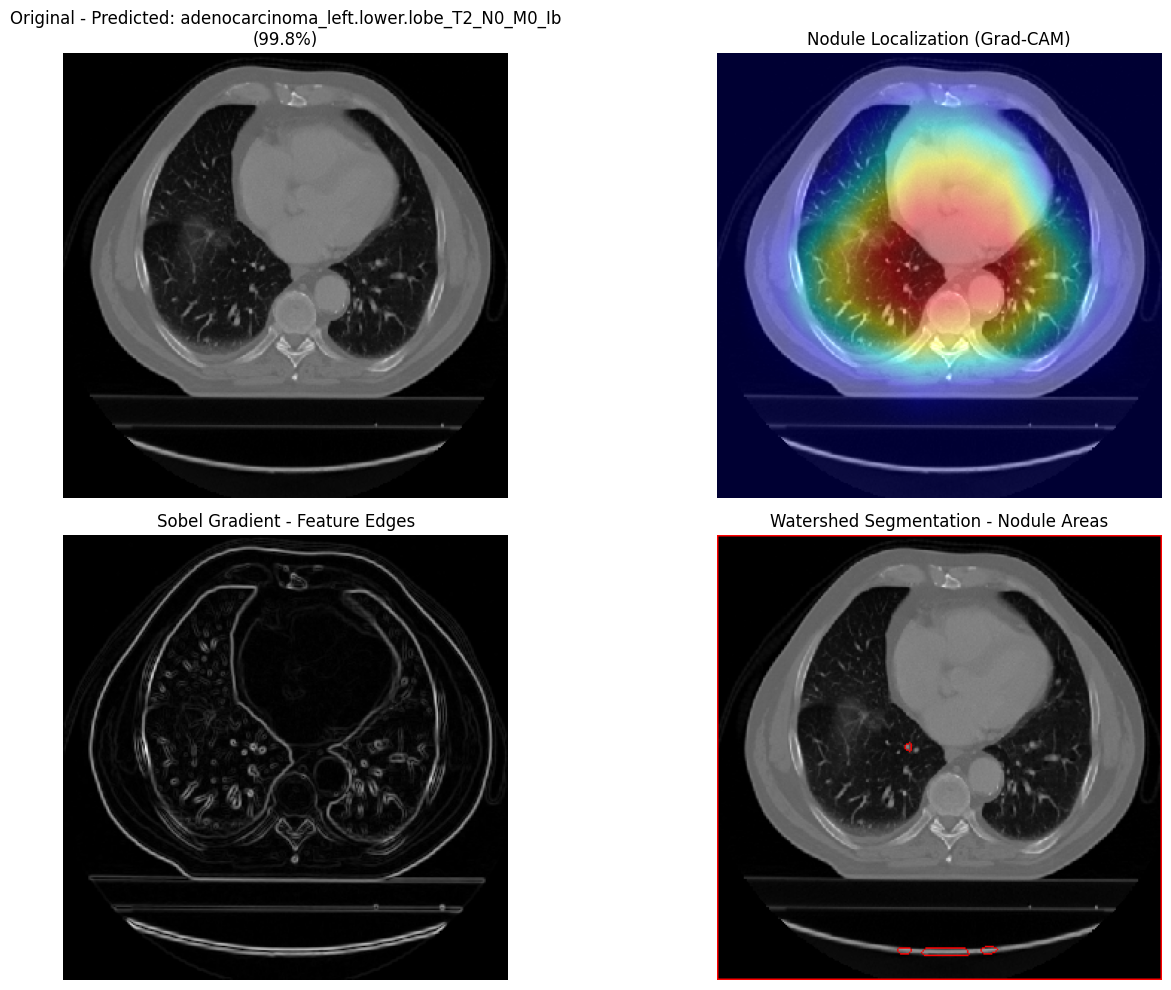

('adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', np.float32(99.76746))

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import cv2
import os

# Mount Google Drive to access your saved model
from google.colab import drive
drive.mount('/content/drive')

# Define image size - must match what you trained with
IMAGE_SIZE = (299, 299)

# Class names in the correct order (replace with your actual classes if different)
class_names = ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
               'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
               'normal',
               'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

# Load the saved model
model = load_model('/content/drive/MyDrive/lung_cancer_model.keras')
model.summary()

# Install OpenCV if not already installed
try:
    import cv2
except ImportError:
    !pip install opencv-python
    import cv2

# Function to load and preprocess a single image
def load_and_preprocess_image(img_path, target_size):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array, np.array(img)

# Basic prediction function
def predict_image(img_path):
    try:
        img_array, img_display = load_and_preprocess_image(img_path, IMAGE_SIZE)
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])
        confidence = predictions[0][predicted_class] * 100

        predicted_label = class_names[predicted_class]

        # Show image with predictions
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(img_display)
        plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
        plt.axis('off')

        # Show confidence scores for all classes
        plt.subplot(1, 2, 2)
        bars = plt.barh(class_names, predictions[0] * 100)
        plt.xlabel('Confidence (%)')
        plt.title('Prediction Confidence by Class')
        plt.xlim(0, 100)

        # Add percentage labels to bars
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
                    ha='left', va='center')

        plt.tight_layout()
        plt.show()

        return predicted_label, confidence
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None, None

# Grad-CAM visualization for nodule localization
def generate_gradcam(model, img_array, layer_name=None):
    """Generate Grad-CAM visualization to show where the model is looking"""
    # Find the last convolutional layer if not specified
    if layer_name is None:
        for layer in reversed(model.layers):
            if 'conv' in layer.name:
                layer_name = layer.name
                print(f"Using layer: {layer_name}")
                break

    # Create a model that maps the input image to the activations of the last conv layer
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    # Extract gradients and feature map
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    # Weight and combine feature maps
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    # Resize heatmap to match image size
    img = img_array[0] * 255
    img = img.astype(np.uint8)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    superimposed_img = heatmap * 0.4 + img
    superimposed_img = np.clip(superimposed_img / 255.0, 0, 1)

    return superimposed_img

# Sobel gradient for edge detection
def apply_sobel_gradient(image):
    """Apply Sobel operator for edge detection"""
    # Convert to grayscale if RGB
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image

    # Apply Sobel operator in x and y directions
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Combine for gradient magnitude
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    magnitude = np.uint8(255 * magnitude / np.max(magnitude))

    return magnitude

# Watershed segmentation for nodule identification
def apply_watershed(image, gradient):
    """Apply watershed algorithm for segmentation"""
    # Ensure image is uint8
    image_uint8 = image.astype(np.uint8)

    # Threshold the gradient image
    _, thresh = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Noise removal
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)

    # Finding unknown region
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown==255] = 0

    # Apply watershed
    markers = cv2.watershed(image_uint8, markers)

    # Color the segmented nodules
    segmented = image.copy()
    segmented[markers == -1] = [255, 0, 0]  # Mark boundaries in red

    return segmented

# Complete analysis function
def analyze_lung_image(img_path, model):
    """Complete analysis of a lung CT image"""
    # Preprocess the image
    img_array, img_display = load_and_preprocess_image(img_path, IMAGE_SIZE)

    # Get predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class] * 100
    predicted_label = class_names[predicted_class]

    # Generate Grad-CAM for nodule localization
    gradcam = generate_gradcam(model, img_array)

    # Apply Sobel gradient
    gradient = apply_sobel_gradient(img_display)

    # Apply watershed segmentation
    segmented = apply_watershed(img_display, gradient)

    # Display results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(img_display)
    plt.title(f"Original - Predicted: {predicted_label}\n({confidence:.1f}%)")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(gradcam)
    plt.title("Nodule Localization (Grad-CAM)")
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(gradient, cmap='gray')
    plt.title("Sobel Gradient - Feature Edges")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(segmented)
    plt.title("Watershed Segmentation - Nodule Areas")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return predicted_label, confidence

# Example usage - analyze a test image
test_image = '/content/drive/MyDrive/dataset/test/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000109 (5).png'
analyze_lung_image(test_image, model)

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import cv2
import os
from IPython.display import display, Markdown

# Install OpenCV if not already installed
try:
    import cv2
except ImportError:
    !pip install opencv-python
    import cv2

# Mount Google Drive to access your saved model
from google.colab import drive
drive.mount('/content/drive')

# Define image size - must match what you trained with
IMAGE_SIZE = (299, 299)

# Class names in the correct order (replace with your actual classes if different)
class_names = ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
               'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
               'normal',
               'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

# Optional: Use shorter display names
display_names = {
    'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 'Adenocarcinoma',
    'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 'Large Cell Carcinoma',
    'normal': 'Normal',
    'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 'Squamous Cell Carcinoma'
}

# Load the saved model
print("Loading model...")
model = load_model('/content/drive/MyDrive/lung_cancer_model.keras')
model.summary()

# Function to load and preprocess a single image
def load_and_preprocess_image(img_path, target_size):
    """Load and preprocess an image for model input"""
    img = load_img(img_path, target_size=target_size)
    img_display = np.array(img).astype(np.uint8)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array, img_display

# Lung segmentation function
def segment_lungs(img):
    """Extract just the lung region from CT scan"""
    # Convert to grayscale if needed
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray = img.copy()

    # Apply CLAHE for better contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)

    # Binary threshold
    _, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Fill holes
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(binary)

    # Find the largest contours (likely the lungs)
    areas = [cv2.contourArea(c) for c in contours]
    if not areas:
        return img  # Return original if no contours

    # Get indices of 3 largest contours (body and possibly both lungs)
    if len(areas) >= 3:
        max_idx = np.argsort(areas)[-3:]
    else:
        max_idx = np.argsort(areas)[-len(areas):]

    # Draw the largest contours
    for idx in max_idx:
        cv2.drawContours(mask, contours, idx, 255, -1)

    # Apply mask to original image
    if len(img.shape) == 3:
        result = img.copy()
        for i in range(3):
            result[:,:,i] = cv2.bitwise_and(result[:,:,i], result[:,:,i], mask=mask)
    else:
        result = cv2.bitwise_and(img, img, mask=mask)

    return result

# Improved nodule detection function
def detect_nodules(img):
    """Better nodule detection with adaptive methods"""
    # Convert to grayscale if needed
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray = img.copy()

    # Apply median filtering to reduce noise
    blurred = cv2.medianBlur(gray, 5)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )

    # Morphological operations to enhance nodules
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Find contours of potential nodules
    contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours by size (nodules usually have certain size range)
    min_area = 20  # Minimum area of nodules
    max_area = 1000  # Maximum area of nodules
    nodule_contours = [c for c in contours if min_area < cv2.contourArea(c) < max_area]

    # Create mask of nodules
    nodule_mask = np.zeros_like(gray)
    cv2.drawContours(nodule_mask, nodule_contours, -1, 255, -1)

    return nodule_mask, nodule_contours

# Enhanced Grad-CAM for better localization
def enhanced_gradcam(model, img_array, class_idx=None):
    """More precise Grad-CAM implementation"""
    # Find the target convolutional layer
    # For Xception, try these layers
    target_layers = ['block14_sepconv2_act', 'block13_sepconv2_act', 'conv2d_4']

    layer_name = None
    for target in target_layers:
        try:
            model.get_layer(target)
            layer_name = target
            print(f"Using layer: {layer_name}")
            break
        except:
            continue

    # If named layers not found, find a conv layer automatically
    if layer_name is None:
        for layer in reversed(model.layers):
            if len(layer.output_shape) == 4:  # Looking for conv layers
                layer_name = layer.name
                print(f"Automatically selected layer: {layer_name}")
                break

    # Create grad model
    last_conv_layer = model.get_layer(layer_name)
    grad_model = tf.keras.models.Model(
        inputs=[model.inputs],
        outputs=[last_conv_layer.output, model.output]
    )

    # Compute gradient
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        if class_idx is None:
            class_idx = tf.argmax(predictions[0])
        score = predictions[:, class_idx]

    # Extract gradients
    grads = tape.gradient(score, conv_output)

    # Improved pooling - using global average pooling
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight the channels by importance
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_output), axis=-1)

    # Post-processing - normalize to [0,1]
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    return heatmap

# Apply Sobel operator for edge detection
def apply_sobel_gradient(image):
    """Apply Sobel operator for edge detection"""
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Sobel operator in x and y directions
    sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

    # Combine for gradient magnitude
    magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Normalize to 0-255 range for display
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return magnitude

# Apply watershed algorithm for segmentation
def apply_watershed(image, nodule_mask):
    """Apply watershed algorithm for segmentation"""
    # Ensure image is uint8
    image_uint8 = image.astype(np.uint8)

    # Create sure background by dilating nodule mask
    kernel = np.ones((3,3), np.uint8)
    sure_bg = cv2.dilate(nodule_mask, kernel, iterations=3)

    # Find sure foreground using distance transform
    dist_transform = cv2.distanceTransform(nodule_mask, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)

    # Find unknown region
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labelling for watershed
    _, markers = cv2.connectedComponents(sure_fg)

    # Add 1 to all labels to ensure background is not 0
    markers = markers + 1

    # Mark unknown region with 0
    markers[unknown==255] = 0

    # Apply watershed
    markers = cv2.watershed(image_uint8, markers)

    # Create result image
    segmented = image.copy()
    segmented[markers == -1] = [255, 0, 0]  # Mark boundaries in red

    return segmented

# Complete analysis function with all enhancements
def advanced_lung_analysis(img_path, model):
    """Enhanced analysis with more accurate visualization"""
    print(f"Analyzing image: {img_path}")

    # 1. Load and preprocess
    img_array, img_display = load_and_preprocess_image(img_path, IMAGE_SIZE)

    # 2. Segment lungs
    print("Segmenting lungs...")
    lung_segmented = segment_lungs(img_display)

    # 3. Get predictions
    print("Running model prediction...")
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class] * 100
    predicted_label = class_names[predicted_class]
    display_label = display_names.get(predicted_label, predicted_label)

    # 4. Generate enhanced Grad-CAM for the predicted class
    print("Generating Grad-CAM heatmap...")
    heatmap = enhanced_gradcam(model, img_array, predicted_class)

    # Resize heatmap to match image size
    heatmap_resized = cv2.resize(heatmap, (img_display.shape[1], img_display.shape[0]))
    heatmap_colored = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_colored, cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

    # Create grad-cam overlay
    alpha = 0.4
    gradcam_overlay = img_display.copy()
    gradcam_overlay = cv2.addWeighted(heatmap_colored, alpha, gradcam_overlay, 1-alpha, 0)

    # 5. Detect nodules
    print("Detecting nodules...")
    nodule_mask, nodule_contours = detect_nodules(lung_segmented)

    # Draw contours on original image
    nodule_highlight = img_display.copy()
    cv2.drawContours(nodule_highlight, nodule_contours, -1, (0, 255, 0), 2)

    # 6. Apply sobel for edge detection
    print("Applying Sobel gradient...")
    sobel_result = apply_sobel_gradient(lung_segmented)

    # 7. Apply watershed segmentation
    print("Performing watershed segmentation...")
    watershed_result = apply_watershed(img_display, nodule_mask)

    # 8. Display everything
    plt.figure(figsize=(15, 12))

    plt.subplot(3, 2, 1)
    plt.imshow(img_display)
    plt.title(f"Original Image")
    plt.axis('off')

    plt.subplot(3, 2, 2)
    plt.imshow(lung_segmented)
    plt.title("Lung Segmentation")
    plt.axis('off')

    plt.subplot(3, 2, 3)
    plt.imshow(gradcam_overlay)
    plt.title(f"GradCAM: {display_label} ({confidence:.1f}%)")
    plt.axis('off')

    plt.subplot(3, 2, 4)
    plt.imshow(nodule_highlight)
    plt.title(f"Detected Nodules: {len(nodule_contours)}")
    plt.axis('off')

    plt.subplot(3, 2, 5)
    plt.imshow(sobel_result, cmap='gray')
    plt.title("Sobel Edge Detection")
    plt.axis('off')

    plt.subplot(3, 2, 6)
    plt.imshow(watershed_result)
    plt.title("Watershed Segmentation")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # 9. Add confidence bar chart
    plt.figure(figsize=(10, 3))

    # Get display names for chart
    chart_names = [display_names.get(name, name) for name in class_names]

    bars = plt.barh(chart_names, predictions[0] * 100)
    plt.xlabel('Confidence (%)')
    plt.title('Prediction Confidence by Class')
    plt.xlim(0, 100)

    # Add percentage labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
                ha='left', va='center')

    plt.tight_layout()
    plt.show()

    # 10. Calculate additional metrics for report
    nodule_area = sum([cv2.contourArea(c) for c in nodule_contours])
    total_area = img_display.shape[0] * img_display.shape[1]
    nodule_percentage = (nodule_area / total_area) * 100

    # Determine severity based on multiple factors
    severity = "Low"
    if confidence > 85 and predicted_label != "normal":
        if nodule_percentage > 2.0 or len(nodule_contours) > 5:
            severity = "High"
        elif nodule_percentage > 0.5 or len(nodule_contours) > 2:
            severity = "Medium"

    # 11. Print summary report as formatted markdown
    report = f"""
    # Lung Cancer Analysis Report

    ## Diagnosis
    - **Classification**: {display_label}
    - **Confidence**: {confidence:.2f}%
    - **Severity**: {severity}

    ## Nodule Analysis
    - **Nodules detected**: {len(nodule_contours)}
    - **Affected area**: {nodule_percentage:.2f}% of lung tissue

    ## Recommended Action
    {get_recommendation(predicted_label, confidence, nodule_contours)}
    """

    display(Markdown(report))

    return {
        "predicted_class": predicted_label,
        "confidence": confidence,
        "nodules_count": len(nodule_contours),
        "nodule_percentage": nodule_percentage,
        "severity": severity
    }

# Helper function to determine recommendations
def get_recommendation(predicted_label, confidence, nodule_contours):
    if predicted_label == "normal" and confidence > 90:
        return "No further action required. Regular screening as per standard protocol."

    if confidence < 80:
        return "Result is inconclusive. Recommend additional CT scans with contrast or PET scan."

    if len(nodule_contours) > 5:
        return "**URGENT**: Multiple nodules detected. Immediate oncology consultation and biopsy recommended."

    if "adenocarcinoma" in predicted_label:
        return "Consult with oncologist. Follow-up with biopsy and staging. Treatment plan may include surgical resection."

    if "large.cell.carcinoma" in predicted_label:
        return "**URGENT**: Consult with oncologist. Biopsy recommended. Treatment planning required, may include combination therapy."

    if "squamous.cell.carcinoma" in predicted_label:
        return "Consult with oncologist. Biopsy and additional imaging recommended. Treatment planning required."

    return "Further examination required. Consult with pulmonologist or oncologist."

# Function to simplify testing on multiple images
def batch_analyze(image_paths, model):
    """Analyze multiple images and display a summary"""
    results = []

    for img_path in image_paths:
        print(f"\nProcessing {img_path}...")
        result = advanced_lung_analysis(img_path, model)
        results.append(result)

    # Print batch summary
    print("\n=== BATCH ANALYSIS SUMMARY ===")
    for i, (path, result) in enumerate(zip(image_paths, results)):
        print(f"{i+1}. {path.split('/')[-1]}: {display_names.get(result['predicted_class'], result['predicted_class'])} ({result['confidence']:.1f}%)")

    return results

# Example usage - define your test images
test_images = [
    '/content/drive/MyDrive/dataset/test/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000109 (5).png',
    '/content/drive/MyDrive/dataset/test/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000123 (4).png',
    '/content/drive/MyDrive/dataset/test/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000163 (4).png'
]

# Analyze a single image
# advanced_lung_analysis(test_images[0], model)

# Analyze multiple images
# batch_analyze(test_images, model)

# Single image analysis function for new images
def analyze_new_image(img_path):
    """Analyze a single new image"""
    return advanced_lung_analysis(img_path, model)

# Allow user to upload an image in Colab
def upload_and_analyze():
    """Upload and analyze a custom image"""
    from google.colab import files

    print("Please upload a lung CT scan image...")
    uploaded = files.upload()

    for filename in uploaded.keys():
        full_path = os.path.join(os.getcwd(), filename)
        print(f"Analyzing uploaded file: {filename}")
        advanced_lung_analysis(full_path, model)

# Uncomment to use the upload feature
# upload_and_analyze()

print("\nCode loaded successfully. You can now:")
print("1. Run 'advanced_lung_analysis(image_path, model)' on a single image")
print("2. Run 'batch_analyze(image_list, model)' on multiple images")
print("3. Run 'upload_and_analyze()' to upload your own image")

Mounted at /content/drive
Loading model...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 42,992,070 (164.00 MB)

 Trainable params: 10,534,604 (40.19 MB)

 Non-trainable params: 11,388,256 (43.44 MB)

 Optimizer params: 21,069,210 (80.37 MB)


Code loaded successfully. You can now:
1. Run 'advanced_lung_analysis(image_path, model)' on a single image
2. Run 'batch_analyze(image_list, model)' on multiple images
3. Run 'upload_and_analyze()' to upload your own image


Analyzing image: /content/drive/MyDrive/dataset/test/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000132 (8).png
Segmenting lungs...
Running model prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
Generating Grad-CAM heatmap...
Using layer: block14_sepconv2_act
Detecting nodules...
Applying Sobel gradient...
Performing watershed segmentation...


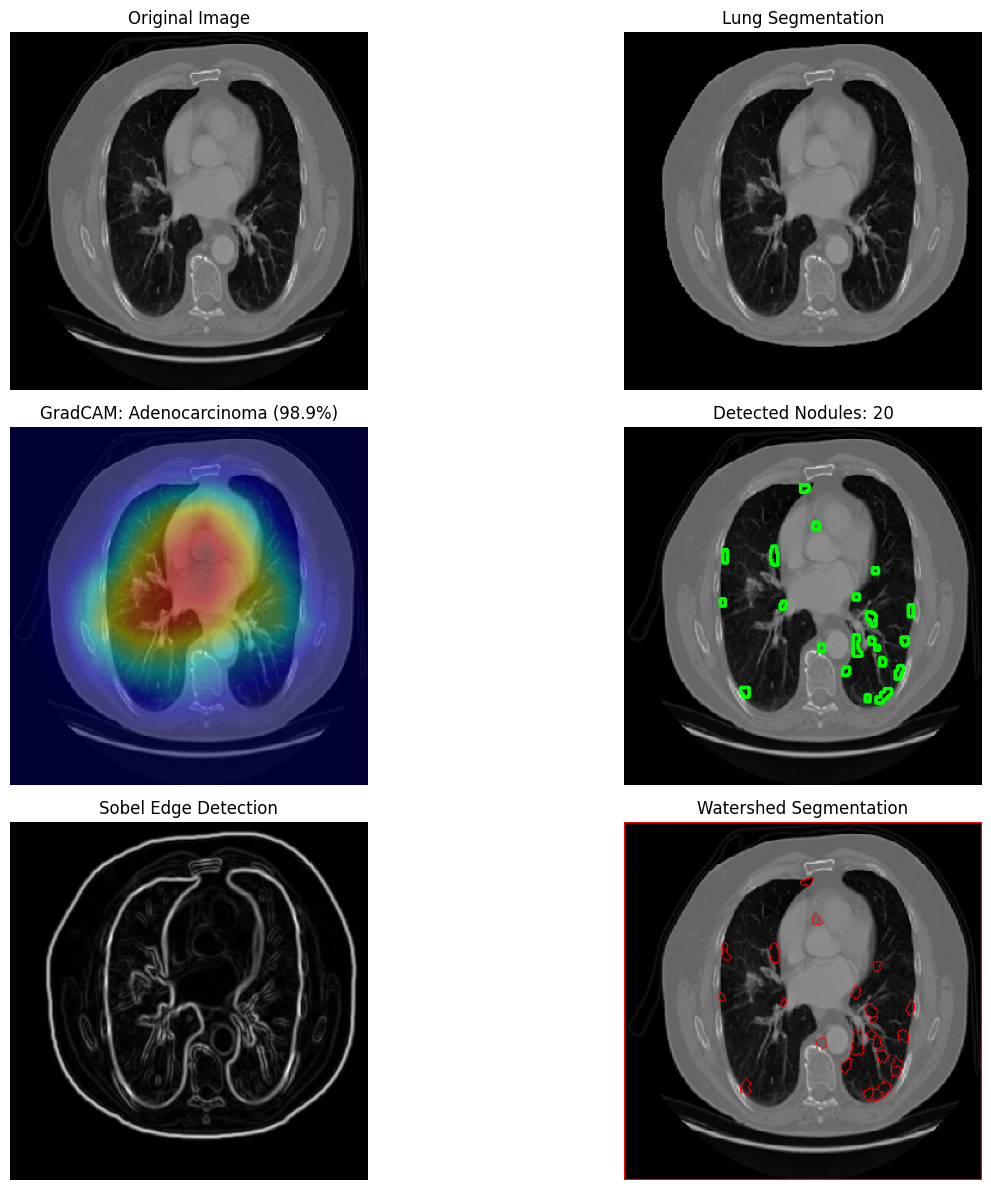

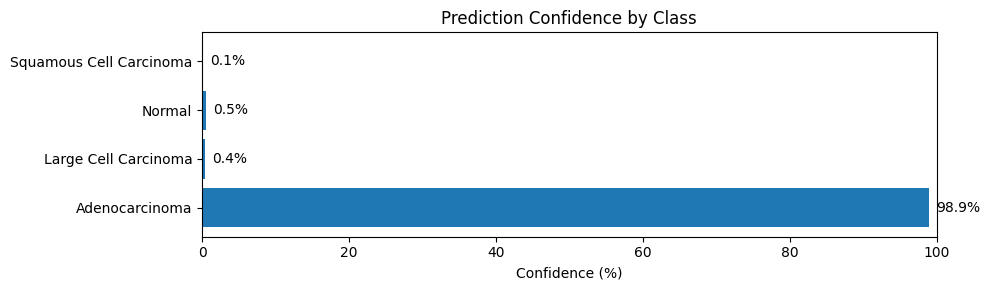


    # Lung Cancer Analysis Report
    
    ## Diagnosis
    - **Classification**: Adenocarcinoma
    - **Confidence**: 98.91%
    - **Severity**: High
    
    ## Nodule Analysis
    - **Nodules detected**: 20
    - **Affected area**: 1.01% of lung tissue
    
    ## Recommended Action
    **URGENT**: Multiple nodules detected. Immediate oncology consultation and biopsy recommended.
    

{'predicted_class': 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'confidence': np.float32(98.90898),
 'nodules_count': 20,
 'nodule_percentage': 1.0072594266283375,
 'severity': 'High'}

In [5]:
image_path = '/content/drive/MyDrive/dataset/test/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000132 (8).png'
advanced_lung_analysis(image_path, model)